## Observations and Insights 

In [221]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [222]:
# Checking the number of mice.
mice=combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [223]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [224]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [225]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [226]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df=cleaned_df["Mouse ID"].value_counts()
cleaned_number_of_mice=len(cleaned_mice_df)
cleaned_number_of_mice

248

## Summary Statistics

In [227]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean
regimen_median = cleaned_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median
regimen_variance = cleaned_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance
regimen_std = cleaned_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std
regimen_sem = cleaned_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [228]:
#saving to a df
summary1= pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [229]:
# Generate a summary statistics table of
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
single_group_by = cleaned_df.groupby('Drug Regimen')
single_group_by
summary2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

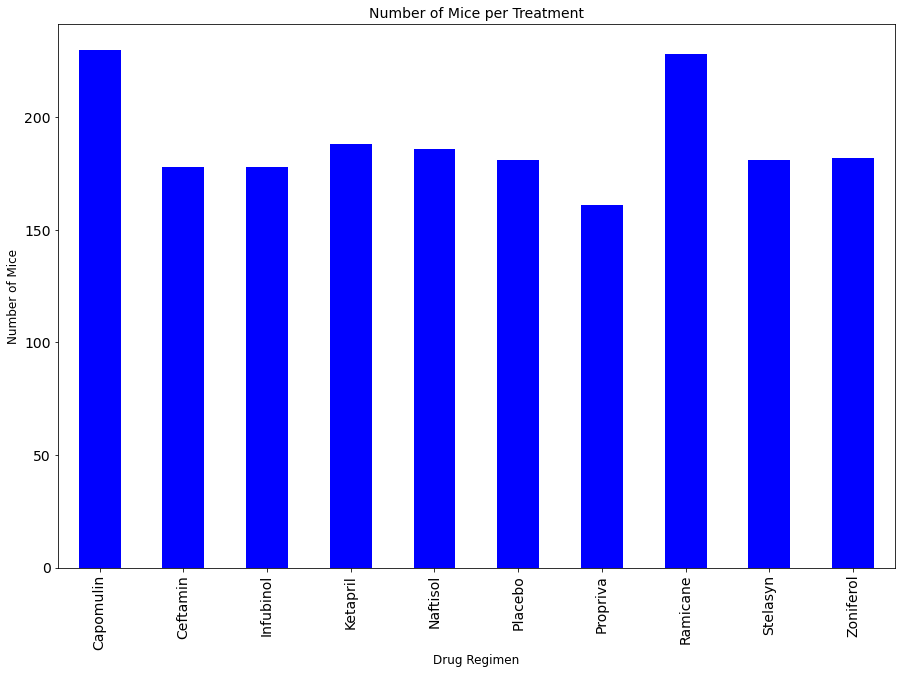

In [230]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_countpt = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
plot_pandas = mice_countpt.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment",fontsize = 14)


Text(0, 0.5, 'Number of Mice')

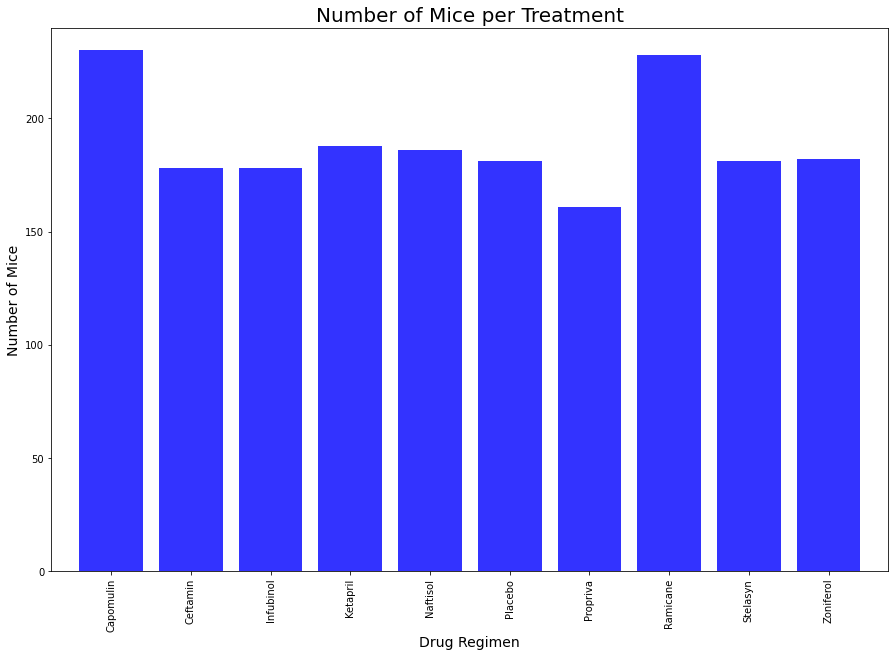

In [231]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_list =(combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list
x_axis = np.arange(len(mice_countpt))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)



(-1.1199395799512024,
 1.1085163149757233,
 -1.1187480755433892,
 1.108793637086287)

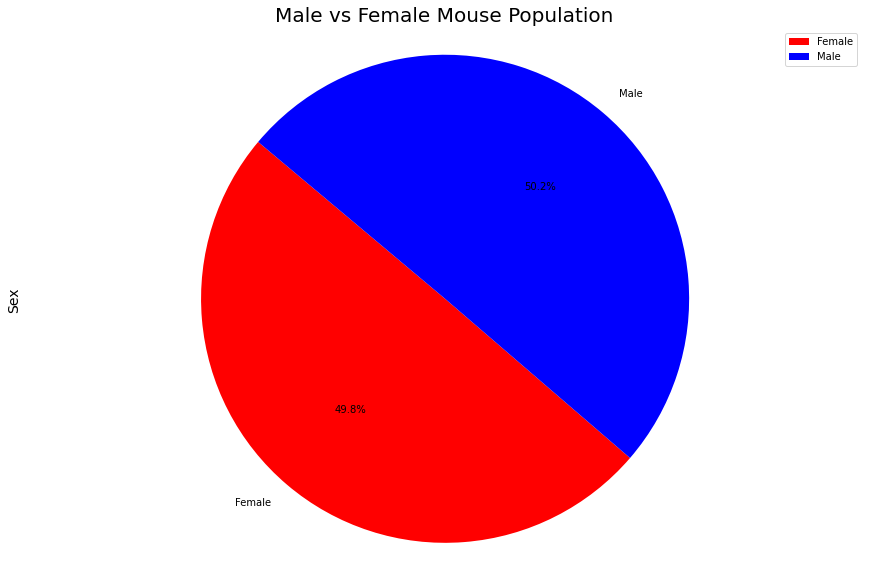

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_gender = combined_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]
mouse_gender


#---------

plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = ('red', 'blue'), startangle=140, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

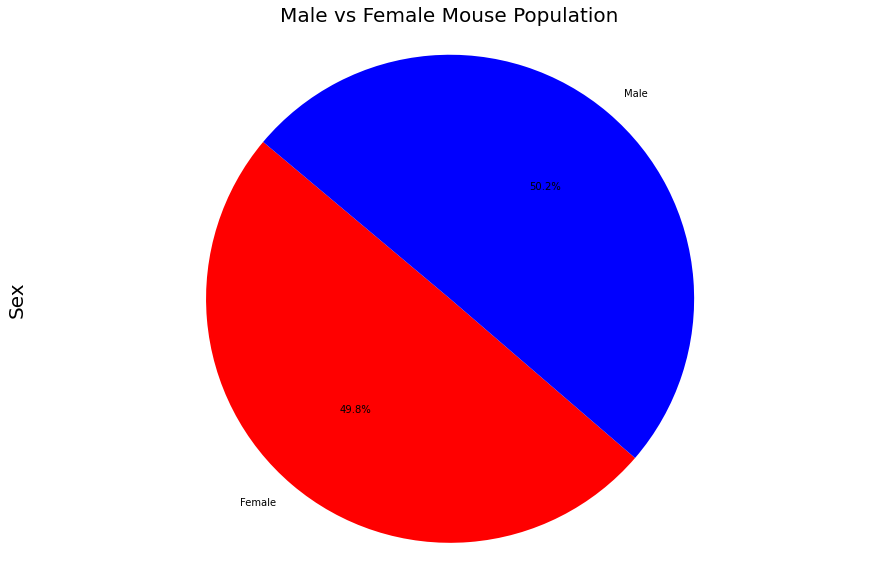

In [233]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes,labels=labels,  colors = ('red', 'blue'), autopct="%1.1f%%", startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 20)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [234]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

best_regimes = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [235]:
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

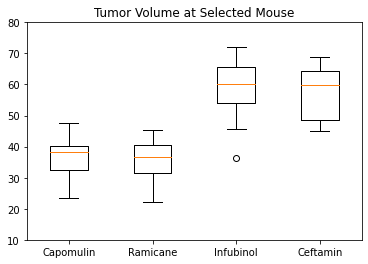

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

plt.boxplot(tumor_vols, labels=top_4)
plt.title( 'Tumor Volume at Selected Mouse' )
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [237]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


Text(0, 0.5, 'Tumor Volume (mm3)')

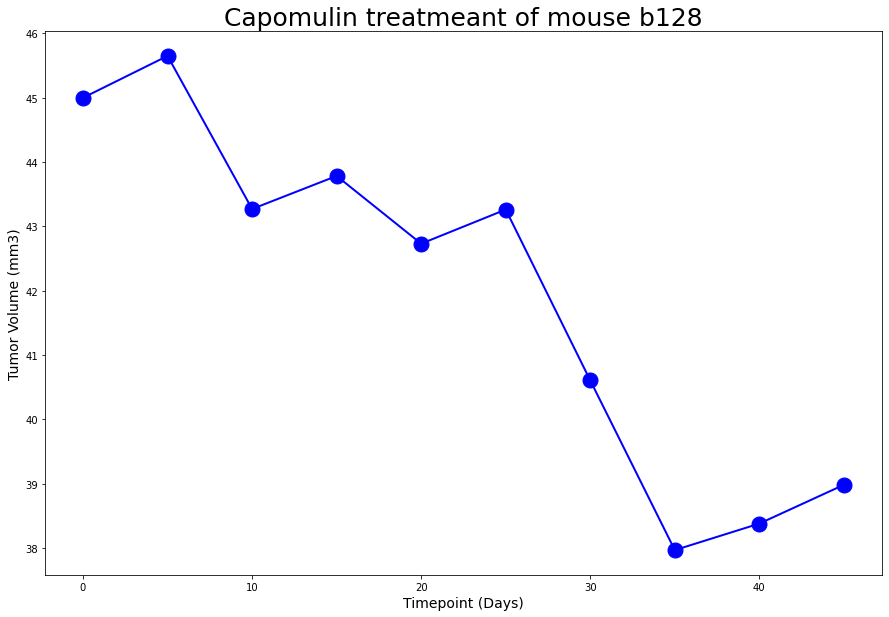

In [238]:
plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
plot.head()
x_axis = plot["Timepoint"]
tumsiz = plot["Tumor Volume (mm3)"]


fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b128',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

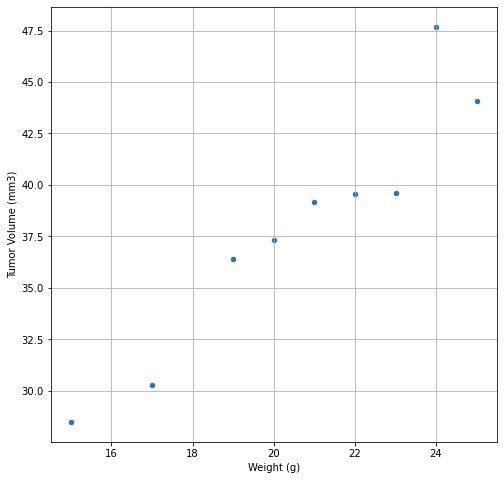

In [239]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_merge.head()
Capomulin_scatter = Capomulin_merge[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
Capomulin_scatter
Capomulin_scatter_plot = Capomulin_scatter.reset_index()
Capomulin_grouped_weight = Capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

Capomulin_plot = pd.DataFrame(Capomulin_grouped_weight).reset_index()

#capomulin_scatter
capomulin_scatter = Capomulin_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))




## Correlation and Regression

The r-squared is: 0.9032375619522788


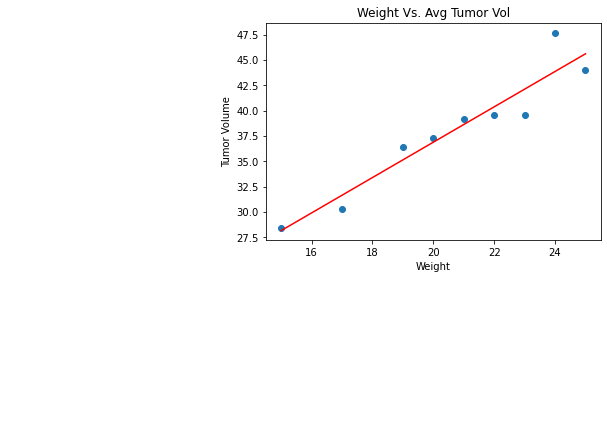

In [240]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_plot["Weight (g)"]
y_values = Capomulin_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
print(f"The r-squared is: {rvalue**2}")
plt.show()
